# Weather–Delay Analysis at Hartsfield–Jackson Atlanta International Airport (ATL)

This notebook contains analysis and visualization code supporting the manuscript:

**“Analysis of the Impact of Weather Conditions on Flight Delays at Hartsfield–Jackson Atlanta International Airport (ATL) During 2013–2023.”**

The notebook focuses on selected analyses presented in the manuscript, including:
- Seasonal characteristics of weather-related flight delays,
- Statistical assessment of seasonal differences using ANOVA and Tukey’s HSD,
- Simple and multivariate regression analyses linking meteorological variables to flight delays.

This notebook reproduces selected figures and tables referenced in the manuscript.
Other figures and tables are generated in separate analysis scripts for clarity and organization.


## Figure 2 
### Seasonal weather-related flight delays at ATL: (a) Number of delayed flights, (b) Total delay minutes per season. 

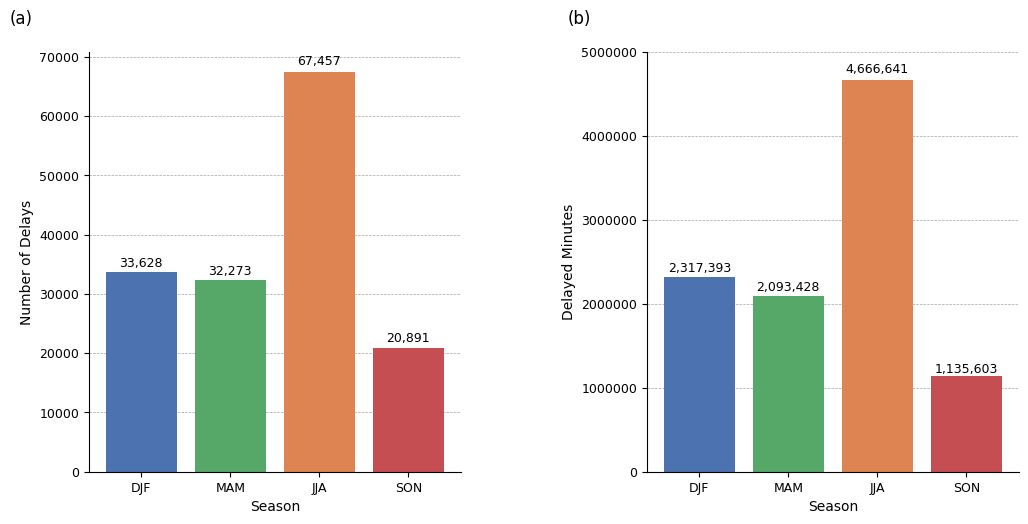

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
seasons = ['DJF', 'MAM', 'JJA', 'SON']
number_of_delays = [33628, 32273, 67457, 20891]
delayed_minutes = [2317393, 2093428, 4666641, 1135603]

# Seasonal colors
colors = {
    'DJF': '#4C72B0',  # blue
    'MAM': '#55A868',  # green
    'JJA': '#DD8452',  # orange
    'SON': '#C44E52'   # red
}
bar_colors = [colors[s] for s in seasons]

# Two-panel figure
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=False)
fig.subplots_adjust(wspace=0.5, top=0.95)  # spacing between subplots

# Function to add labels above bars
def add_bar_labels(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + max(height*0.01, 500),  # small offset above bar
            f'{int(height):,}',
            ha='center',
            va='bottom',
            fontsize=9
        )

# ---------- (a) Number of Weather-Related Delays ----------
bars1 = axes[0].bar(seasons, number_of_delays, color=bar_colors)
axes[0].set_ylabel('Number of Delays')
axes[0].set_xlabel('Season')
axes[0].ticklabel_format(style='plain', axis='y')

# Subplot label (a)
axes[0].text(-0.15, 1.10, '(a)', transform=axes[0].transAxes,
             fontsize=12, va='top', ha='right')

add_bar_labels(bars1, axes[0])

# ---------- (b) Total Weather-Related Delayed Minutes ----------
bars2 = axes[1].bar(seasons, delayed_minutes, color=bar_colors)
axes[1].set_ylabel('Delayed Minutes')
axes[1].set_xlabel('Season')
axes[1].ticklabel_format(style='plain', axis='y')

# Subplot label (b)
axes[1].text(-0.15, 1.10, '(b)', transform=axes[1].transAxes,
             fontsize=12, va='top', ha='right')

add_bar_labels(bars2, axes[1])

# Set y-axis limit for (b) automatically with minimum 5,000,000
y_max_b = max(delayed_minutes)
axes[1].set_ylim(0, np.maximum(y_max_b * 1.05, 5000000))

# Journal styling and grid
for ax in axes:
    ax.tick_params(axis='both', labelsize=9)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    ax.set_axisbelow(True)  # grid behind bars

plt.show()

## Figure 4
### Comparison of normalized seasonal meteorological variables and flight delays at ATL (2013–2023). Bars indicate meteorological parameters (scaled 0–1), while the black line represents the number of flight delays. Seasons are categorized as DJF, MAM, JJA, and SON.

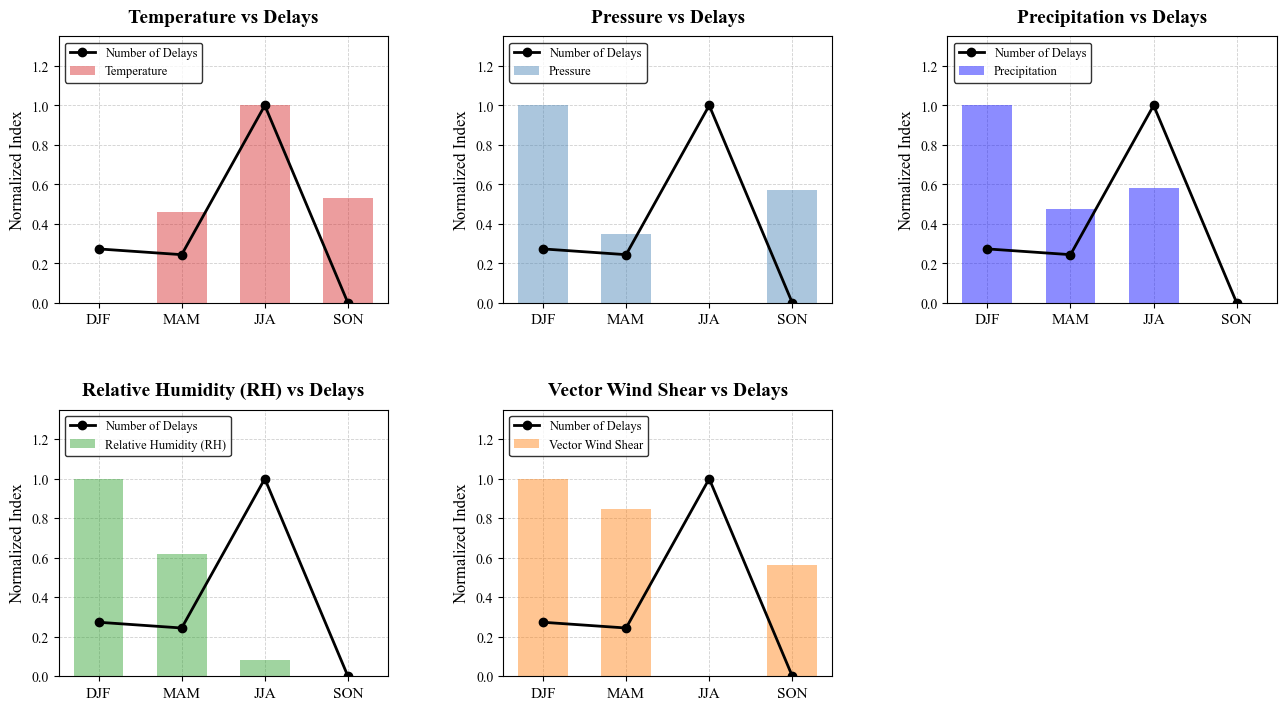

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set font
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

# 1. Load Data
file_path = "Data Variabel Meteorologi.xlsx"
df = pd.read_excel(file_path)

# 2. Define Meteorological Seasons
def get_season(month):
    if month in [12, 1, 2]: return 'DJF'
    elif month in [3, 4, 5]: return 'MAM'
    elif month in [6, 7, 8]: return 'JJA'
    else: return 'SON'

df['Season'] = df['Month'].apply(get_season)
season_order = ['DJF', 'MAM', 'JJA', 'SON']

# 3. Parameters and Conventional Colors
met_vars = ['Temperature', 'Pressure', 'Precipitation', 
            'Relative Humidity (RH)', 'Vector Wind Shear']
var_colors = {
    'Temperature': '#d62728', 'Pressure': '#4682B4', 
    'Precipitation': '#0000FF', 'Relative Humidity (RH)': '#2ca02c', 
    'Vector Wind Shear': '#ff7f0e'
}

# 4. Seasonal Mean and Min-Max Normalization
seasonal_mean = df.groupby('Season')[met_vars + ['Number of Delays']].mean().loc[season_order]
seasonal_norm = (seasonal_mean - seasonal_mean.min()) / (seasonal_mean.max() - seasonal_mean.min() + 1e-9)

# 5. Multi-panel Visualization (2x3 Grid)
fig, axes = plt.subplots(2, 3, figsize=(14, 8)) 
axes = axes.flatten()
x = np.arange(len(season_order))

for i, var in enumerate(met_vars):
    ax = axes[i]
    
    ax.bar(x, seasonal_norm[var], color=var_colors[var], alpha=0.45, label=var, width=0.6)
    ax.plot(x, seasonal_norm['Number of Delays'], color='black', marker='o', 
            linewidth=2.0, markersize=6, label='Number of Delays')

    ax.set_title(f"{var} vs Delays", fontsize=14, fontweight='bold', pad=10)
    ax.set_ylim(0, 1.35) 
    ax.set_ylabel('Normalized Index', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(season_order, fontsize=11)
    
    ax.set_axisbelow(True)
    ax.grid(axis='both', linestyle='--', linewidth=0.6, alpha=0.6)
    ax.legend(loc='upper left', fontsize=9, frameon=True, edgecolor='black')

# Clean up layout
fig.delaxes(axes[5])
plt.subplots_adjust(left=0.08, bottom=0.1, right=0.95, top=0.9, wspace=0.35, hspace=0.4)
plt.show()

## Figure 5 
### Seasonal distribution of headwind, crosswind, and tailwind frequencies at 10 m at ATL during 2013–2023. Boxes show seasonal variability, the black line indicates the seasonal mean, and ANOVA p-values denote the significance of seasonal differences.

## Table 2 
### Summary of One-Way ANOVA and Tukey’s HSD Post-hoc Analysis for Seasonal Wind Components.


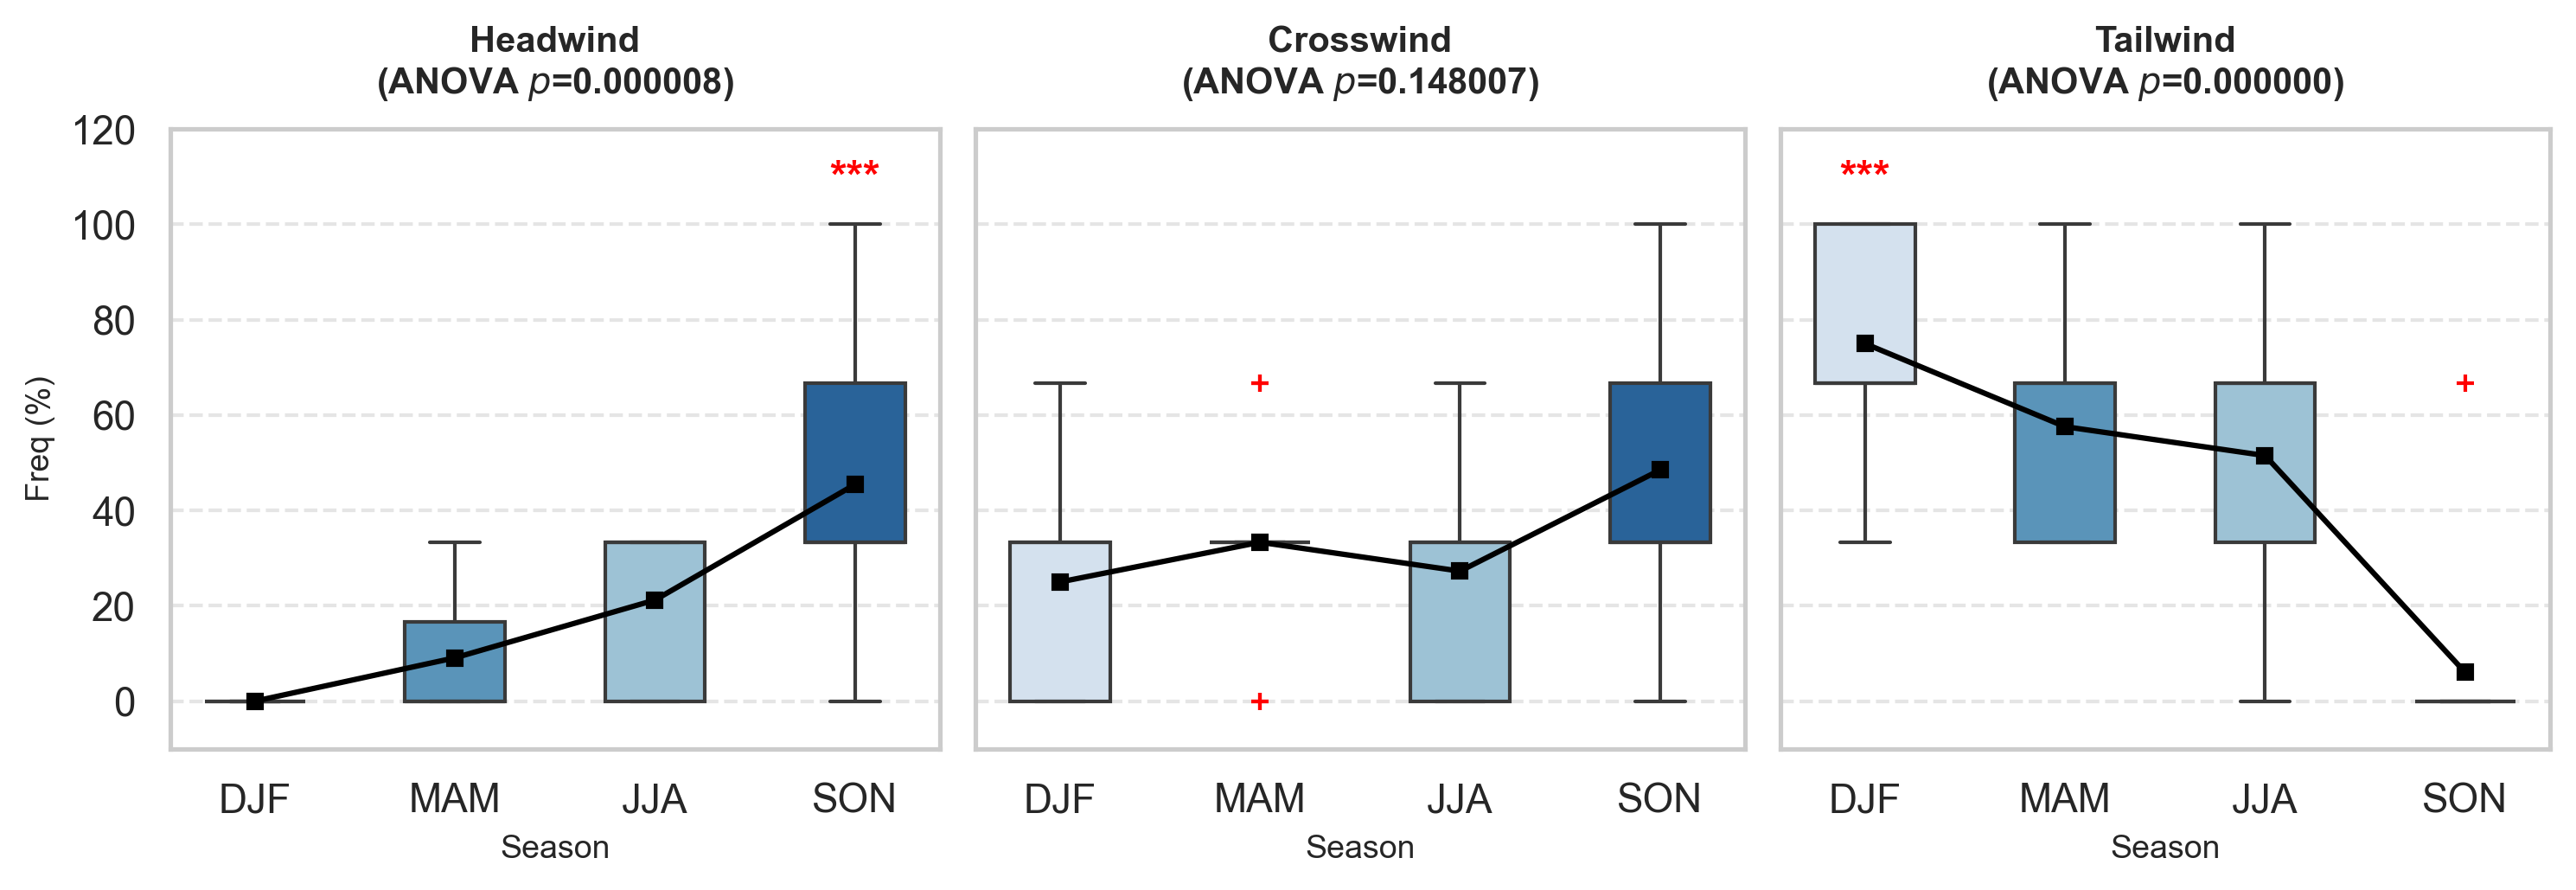


TABLE 2. STATISTICAL SUMMARY (ANOVA + TUKEY HSD)
Component    F-Stat     p-value      Sig    Interpretation       Significant Pairs (Differences Detected)                    
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Headwind     12.19      0.000008     ***    Highly Significant   DJF ≠ JJA, DJF ≠ SON, JJA ≠ SON, MAM ≠ SON                  
Crosswind    1.88       0.148007     -      Not Significant      -                                                           
Tailwind     19.13      0.000000     ***    Highly Significant   DJF ≠ SON, JJA ≠ SON, MAM ≠ SON                             
Note: '≠' indicates a statistically significant difference between seasons
Note: DJF = Winter, MAM = Spring, JJA = Summer, SON = Fall


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# --- Configuration ---
FILE_PATH = "data speed and direction.xlsx"
OUTPUT_FILE = 'Figure_5_Wind_Analysis_Complete.png'

def process_data(path):
    try:
        df = pd.read_excel(path)
    except FileNotFoundError:
        print("Error: File not found.")
        return None

    df['Season_Year'] = df['year']
    df.loc[df['month'] == 12, 'Season_Year'] += 1
    
    # Define Seasons
    df['Season'] = df['month'].apply(lambda m: 
        'DJF' if m in [12, 1, 2] else 'MAM' if m in [3, 4, 5] else 
        'JJA' if m in [6, 7, 8] else 'SON')
    
    # Classify Wind
    def classify_wind(deg):
        d = deg % 360
        if 45 <= d <= 135: return 'Headwind'
        elif 225 <= d <= 315: return 'Tailwind'
        else: return 'Crosswind'
    df['Wind_Type'] = df['wind direction 10m'].apply(classify_wind)
    
    # Frequency Calculation
    stats_df = df.groupby(['Season_Year', 'Season'])['Wind_Type'].value_counts().unstack(fill_value=0)
    stats_df['Total'] = stats_df.sum(axis=1)
    return (stats_df.div(stats_df['Total'], axis=0) * 100).reset_index().melt(
        id_vars=['Season_Year', 'Season'], value_vars=['Headwind', 'Tailwind', 'Crosswind'], 
        var_name='Type', value_name='Freq')

def get_tukey_results(subset):
    """Performs Tukey HSD and returns significant pairs using '≠' notation."""
    tukey = pairwise_tukeyhsd(endog=subset['Freq'], groups=subset['Season'], alpha=0.05)
    results = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])
    sig_pairs = results[results['reject'] == True]
    
    if sig_pairs.empty: return "-"
    
    pairs_list = [f"{row['group1']} ≠ {row['group2']}" for _, row in sig_pairs.iterrows()]
    return ", ".join(pairs_list)

def run_analysis(data):
    season_order = ['DJF', 'MAM', 'JJA', 'SON']
    components = ['Headwind', 'Crosswind', 'Tailwind']
    stats_results = []

    # --- PHASE 1: GENERATE FIGURE ---
    plt.rcParams.update({'font.size': 9, 'font.family': 'sans-serif'})
    fig, axes = plt.subplots(1, 3, figsize=(10, 3.5), sharey=True, dpi=300)

    for i, comp in enumerate(components):
        ax = axes[i]
        subset = data[data['Type'] == comp]
        
        # Plotting
        sns.boxplot(x='Season', y='Freq', data=subset,
            order=season_order, hue='Season', palette='Blues',
            legend=False, ax=ax, width=0.5, linewidth=1,
            flierprops=dict(marker='+', markerfacecolor='red',
                            markersize=5, markeredgecolor='red'))

                
        means = subset.groupby('Season')['Freq'].mean().reindex(season_order)
        ax.plot(range(4), means.values, color='black', marker='s', markersize=4, 
                linewidth=1.5, label='Mean Trend', zorder=10)
        
        # ANOVA
        groups = [subset[subset['Season'] == s]['Freq'].values for s in season_order]
        f_stat, p_val = stats.f_oneway(*groups)
        
        # Logic for Interpretation & Tukey
        sig_pairs = "-"
        if p_val < 0.001:
            sig_mark, interp = "***", "Highly Significant"
            sig_pairs = get_tukey_results(subset)
        elif p_val < 0.05:
            sig_mark, interp = "*", "Significant"
            sig_pairs = get_tukey_results(subset)
        else:
            sig_mark, interp = "-", "Not Significant"

        stats_results.append({
            'Component': comp, 
            'F-Stat': f"{f_stat:.2f}",
            'p-value': f"{p_val:.6f}", 
            'Sig': sig_mark, 
            'Interpretation': interp,
            'Significant Pairs': sig_pairs 
        })

        # Annotations on Plot
        if p_val < 0.05:
            max_idx = np.argmax(means.values)
            max_val = subset[subset['Season'] == season_order[max_idx]]['Freq'].max()
            ax.text(max_idx, max_val + 5, sig_mark, ha='center', va='bottom', 
                    color='red', fontsize=12, fontweight='bold')

        ax.set_title(f"{comp}\n(ANOVA $p$={p_val:.6f})", fontsize=10, fontweight='bold', pad=10)
        ax.set_xlabel("Season", fontsize=9)
        if i == 0: ax.set_ylabel("Freq (%)", fontsize=9)
        else: ax.set_ylabel("")
        ax.set_ylim(-10, 120)
        ax.grid(axis='y', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.savefig(OUTPUT_FILE, dpi=300, bbox_inches='tight')
    plt.show()

    # --- PHASE 2: PRINT COMPLETE TABLE ---
    print("\n" + "="*160)
    print("TABLE 2. STATISTICAL SUMMARY (ANOVA + TUKEY HSD)")
    print("="*160)
    # Header format
    header = f"{'Component':<12} {'F-Stat':<10} {'p-value':<12} {'Sig':<6} {'Interpretation':<20} {'Significant Pairs (Differences Detected)':<60}"
    print(header)
    print("-" * 160)
    
    for row in stats_results:
        line = f"{row['Component']:<12} {row['F-Stat']:<10} {row['p-value']:<12} {row['Sig']:<6} {row['Interpretation']:<20} {row['Significant Pairs']:<60}"
        print(line)
    
    print("="*160)
    print("Note: '≠' indicates a statistically significant difference between seasons")
    print("Note: DJF = Winter, MAM = Spring, JJA = Summer, SON = Fall")
    

if __name__ == "__main__":
    df_processed = process_data(FILE_PATH)
    if df_processed is not None:
        run_analysis(df_processed)

## Figure 6
### Scatter plots with linear regression lines showing the relationship between flight delays and selected meteorological variables at ATL during 2013–2023.

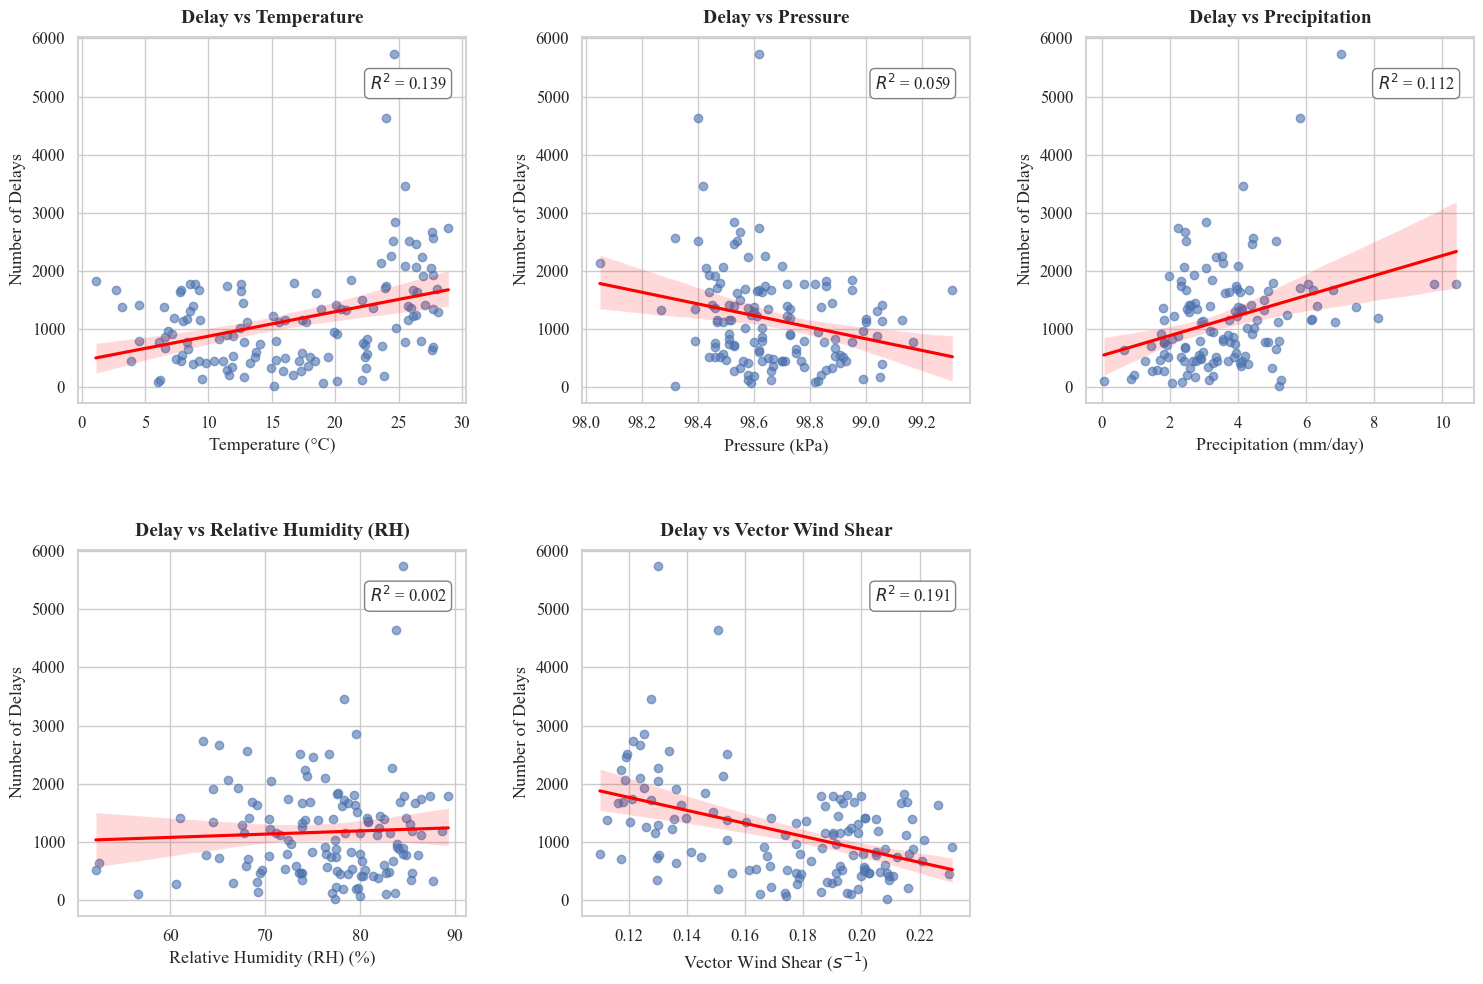

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Set Visual Style & Font 
sns.set(style="whitegrid")
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

# 1. Load Data
file_path = "Data Variabel Meteorologi.xlsx"
df = pd.read_excel(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# 2. Define Variables
weather_columns = ['Temperature', 'Pressure', 'Precipitation', 
                   'Relative Humidity (RH)', 'Vector Wind Shear']

# Mapping units
units = {
    'Temperature': '(°C)',
    'Pressure': '(kPa)',
    'Precipitation': '(mm/day)',
    'Relative Humidity (RH)': '(%)',
    'Vector Wind Shear': '($s^{-1}$)',
    'Number of Delays': 'Jumlah'
}

# 3. Plotting
plt.figure(figsize=(15, 10))

n_cols = 3
n_rows = (len(weather_columns) + n_cols - 1) // n_cols

for i, col in enumerate(weather_columns):
    plt.subplot(n_rows, n_cols, i+1)
    
    if col not in df.columns:
        continue

    # Calculate R-squared
    X = sm.add_constant(df[col])
    y = df['Number of Delays']
    model = sm.OLS(y, X).fit()
    r2 = model.rsquared
    
    # Regression Plot
    sns.regplot(x=col, y='Number of Delays', data=df,
                scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    
    # Add R-squared Annotation
    plt.text(0.95, 0.90, f'$R^2$ = {r2:.3f}',
             horizontalalignment='right',
             verticalalignment='top',
             transform=plt.gca().transAxes,
             fontsize=12,
             bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.3'))
    
    # Labels and Titles
    plt.title(f'Delay vs {col}', fontsize=14, fontweight='bold', pad=10)
    plt.xlabel(f"{col} {units[col]}", fontsize=13)
    plt.ylabel("Number of Delays", fontsize=13)
    
    # Adjust Ticks
    plt.tick_params(axis='both', which='major', labelsize=12) 

# Final Layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

## Table 3
### Multivariate OLS regression results for weather-related flight delays ATL, 2013–2023

In [4]:
import pandas as pd
import statsmodels.api as sm

# 1. DATA ACQUISITION
# Load the dataset 
file_path = "Data Variabel Meteorologi.xlsx"
df = pd.read_excel(file_path)

# 2. DATA PRE-PROCESSING
# Standardize target variable naming
if 'Number of Delays' in df.columns:
    df = df.rename(columns={'Number of Delays': 'NumberOfDelays'})

# Define meteorological predictors and target variable
predictors = [
    'Temperature', 
    'Pressure', 
    'Precipitation', 
    'Relative Humidity (RH)', 
    'Vector Wind Shear'
]
target = 'NumberOfDelays'

# Ensure numerical consistency and handle missing values
for col in predictors + [target]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

analysis_data = df[predictors + [target]].dropna()

# 3. STATISTICAL MODELING
# Define independent (X) and dependent (y) variables
X = analysis_data[predictors]
y = analysis_data[target]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Execute Ordinary Least Squares (OLS) Regression
regression_model = sm.OLS(y, X).fit()

# 4. OUTPUT SUMMARY
# Display comprehensive regression statistics
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:         NumberOfDelays   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     14.61
Date:                Tue, 03 Feb 2026   Prob (F-statistic):           2.78e-11
Time:                        02:30:50   Log-Likelihood:                -1048.3
No. Observations:                 132   AIC:                             2109.
Df Residuals:                     126   BIC:                             2126.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -6826